(a) Q-learning is considered an off-policy control method because it learns the optimal policy independently of the agent's actions. In Q-learning, the agent learns the optimal action-value function (the Q-function), which estimates the value of taking an action in a given state and following the best policy thereafter, regardless of the agent's current policy. This means that while the agent explores the environment, possibly following a more exploratory or different policy, it is simultaneously learning about the optimal policy that maximizes future rewards. The key characteristic that makes Q-learning off-policy is its use of the max operation in the update rule, which selects the maximum estimated future reward achievable from the next state, assuming optimal actions are taken thereafter. This allows Q-learning to learn the optimal policy even when the agent is not following it.

(b) When action selection is greedy, it might seem at first glance that Q-learning and SARSA (State-Action-Reward-State-Action) could become equivalent because both would be focusing on learning from the best-estimated action values. However, even with greedy action selection, Q-learning and SARSA are not exactly the same algorithm, nor will they make exactly the same action selections and weight updates in all situations.

- **Q-learning** updates its Q-values using the maximum estimated future reward for the next state, regardless of the policy being followed. This means it uses the best value from the next state according to the Q-table to update the current Q-value, aligning with learning the optimal policy.

- **SARSA**, on the other hand, updates its Q-values based on the action actually taken by the policy in the next state, not necessarily the best possible action. This means it uses the actual reward obtained from the action taken under the current policy, including the exploration steps, to update the Q-values.

When actions are selected greedily, Q-learning still bases its updates on the assumption of a subsequent optimal action, while SARSA bases its updates on the action that was actually chosen based on the current policy, which would also be greedy in this scenario. However, the difference comes from their respective approaches to estimating future rewards: Q-learning always assumes the future action will be optimal (max value), while SARSA's estimation is tied to the policy's actual choice, even if it's greedy.

Therefore, even with greedy action selection, Q-learning and SARSA will not make exactly the same action selections and weight updates because their updates are based on different principles (optimal future action vs. actual policy's action). In deterministic environments where the policy does not change, their behavior might converge to be similar over time as both approaches learn the optimal policy, but their learning trajectories can still differ.

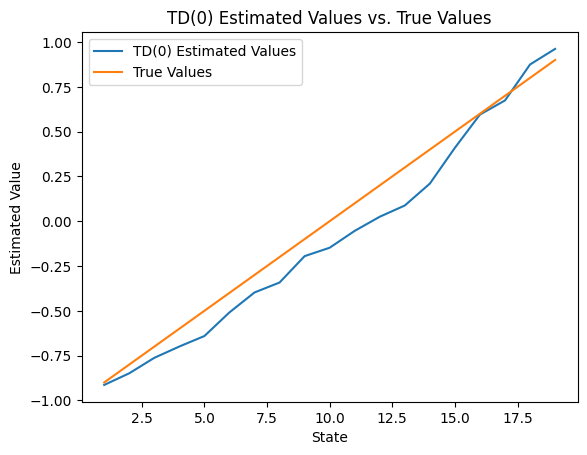

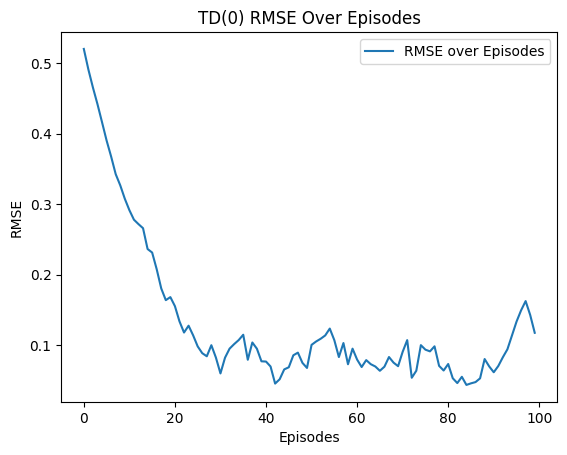

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the random walk
num_states =  19 # You can change this to any number to test different sizes
states = np.arange(1, num_states + 1)
start_state = num_states // 2  # Start from the middle state
left_terminal_state = 0
right_terminal_state = num_states + 1
state_values = np.zeros(num_states + 2)
state_values[left_terminal_state] = -1  # Negative reward for the left terminal state
state_values[right_terminal_state] = 1

# Parameters for n-step TD
alpha = 0.1
gamma = 1
n = 4  # You can vary this to test different n-step TD methods
num_episodes = 100

# Function to run a single episode for n-step TD
def run_episode_n_step_td(state_values, alpha, gamma, n):
    current_state = start_state
    states_and_rewards = [(current_state, 0)]  # List of tuples (state, reward)

    T = float('inf')
    t = 0
    while True:
        if t < T:
            next_state = current_state + np.random.choice([-1, 1])  # Random walk step
            if next_state == left_terminal_state:
                reward = -1  # Negative reward for left terminal state
            elif next_state == right_terminal_state:
                reward = 1   # Positive reward for right terminal state
            else:
                reward = 0   # No reward for non-terminal states
            states_and_rewards.append((next_state, reward))
            if next_state in [left_terminal_state, right_terminal_state]:
                T = t + 1  # Set the time of termination

        tau = t - n + 1  # Time whose state's value is being updated
        if tau >= 0:
            G = sum(gamma ** (i-tau-1) * states_and_rewards[i][1] for i in range(tau+1, min(tau+n, T)+1))
            state_tau, _ = states_and_rewards[tau]
            if tau + n < T:
                G += (gamma ** n) * state_values[states_and_rewards[tau+n][0]]
            state_values[state_tau] += alpha * (G - state_values[state_tau])

        t += 1
        if tau == T - 1:
            break
        current_state = states_and_rewards[t][0] if t < T else None

    return [s for s, _ in states_and_rewards[1:T+1]]


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Run n-step TD for multiple episodes and collect the first episode trajectory
state_values = np.zeros(num_states + 2)
state_values[right_terminal_state] = 1
state_values[left_terminal_state] = -1
true_state_values = np.linspace(-1, 1, num_states + 2)

first_episode_trajectory = []
rmse_values = []
for episode in range(num_episodes):
    trajectory = run_episode_n_step_td(state_values, alpha, gamma, n)
    if episode == 0:
        first_episode_trajectory = trajectory
    current_rmse = rmse(state_values[1:-1], true_state_values[1:-1])
    rmse_values.append(current_rmse)

# Plotting code remains the same
# Plot the estimated state values
plt.plot(states, state_values[1:-1], label='TD(0) Estimated Values')
plt.plot(states, true_state_values[1:-1], label='True Values')
plt.xlabel('State')
plt.ylabel('Estimated Value')
plt.legend()
plt.title('TD(0) Estimated Values vs. True Values')
plt.show()

# Plot the RMSE values over episodes
plt.plot(range(num_episodes), rmse_values, label='RMSE over Episodes')
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.legend()
plt.title('TD(0) RMSE Over Episodes')
plt.show()




# Analysis for (a)
# Change in V(A) after first episode
# Note: The states are 1-indexed here, so state A corresponds to index 1
# change_in_V_A = state_values[1] - 0.5  # State A is the second state (index 1)

# first_episode_trajectory, change_in_V_A, rmse_values[-1]

**Empirical Evidence**
From the first graph, it's evident that the TD(0) algorithm is learning progressively, as indicated by the estimated values approaching the true values over time. However, there's a clear discrepancy between the estimated and true values, suggesting that the algorithm has not fully converged to the true values within the number of episodes run.

The second graph shows that the RMSE initially decreases, suggesting that learning is taking place, but then it starts to increase, which could indicate some instability or inefficiency in the learning process. This could be due to the small number of states (5 non-terminal states), which may not provide enough complexity for the TD(0) algorithm to robustly learn the true values.

**Changes in State Size and Reward Structure**
To address your questions regarding the effect of the size of the random walk and the change in the left-side outcome, we can consider the following modifications to your code:

**Smaller State Space:**
If we were to reduce the number of states, we would expect the learning to be quicker because there are fewer values to estimate and less complexity in the environment. However, the advantage of using a larger n in n-step TD methods might not be as pronounced in a smaller state space because the potential for long-term credit assignment is limited.

**Larger State Space:**
Increasing the state space size would likely highlight the advantages of using larger values of n in n-step TD methods. In a larger state space, looking further ahead could provide more information about the potential future rewards, making the value estimates more accurate.

**Changing the Left-side Outcome:**
If the left-side outcome were changed from 0 to -1, it would introduce a new learning signal that the algorithm would need to adapt to. This could potentially make the TD method's estimates more sensitive to the path taken, as negative outcomes would need to be avoided. This might influence the optimal value of n, as the algorithm would need to balance the immediate rewards with the potential for negative outcomes further down the path.

3a&b)

In [2]:
from enum import IntEnum
from typing import Tuple, Optional, List
from gym import Env, spaces
from gym.utils import seeding
from gym.envs.registration import register

import numpy as np

def register_env_1() -> None:
    """Register custom gym environment so that we can use `gym.make()`

    In your main file, call this function before using `gym.make()` to use the Four Rooms environment.
        register_env_1()
        env = gym.make('WindyGridWorld-v0')

    There are a couple of ways to create Gym environments of the different variants of Windy Grid World.
    1. Create separate classes for each env and register each env separately.
    2. Create one class that has flags for each variant and register each env separately.

        Example:
        (Original)     register(id="WindyGridWorld-v0", entry_point="env:WindyGridWorldEnv")
        (King's moves) register(id="WindyGridWorldKings-v0", entry_point="env:WindyGridWorldEnv", **kwargs)

        The kwargs will be passed to the entry_point class.

    3. Create one class that has flags for each variant and register env once. You can then call gym.make using kwargs.

        Example:
        (Original)     gym.make("WindyGridWorld-v0")
        (King's moves) gym.make("WindyGridWorld-v0", **kwargs)

        The kwargs will be passed to the __init__() function.

    Choose whichever method you like.
    """
    register(id="WindyGridWorld-v0", entry_point=__name__ + ":WindyGridWorldEnv")


class Action(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3


def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    """
    Helper function to map action to changes in x and y coordinates
    Args:
        action (Action): taken action
    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]


class WindyGridWorldEnv(Env):
    def __init__(self):
        """Windy grid world gym environment
        This is the template for Q4a. You can use this class or modify it to create the variants for parts c and d.
        """

        # Grid dimensions (x, y)
        self.rows = 10
        self.cols = 7

        # Wind
        # TODO define self.wind as either a dict (keys would be states) or multidimensional array (states correspond to indices)
        self.wind = np.array((
            np.zeros(7),
            np.zeros(7),
            np.zeros(7),
            np.ones(7),
            np.ones(7),
            np.ones(7),
            np.ones(7)*2,
            np.ones(7)*2,
            np.ones(7),
            np.zeros(7)
        ))

        self.action_space = spaces.Discrete(len(Action))
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(self.rows), spaces.Discrete(self.cols))
        )

        # Set start_pos and goal_pos
        self.start_pos = (0, 3)
        self.goal_pos = (7, 3)
        self.agent_pos = None

    def seed(self, seed: Optional[int] = None) -> List[int]:
        """Fix seed of environment

        In order to make the environment completely reproducible, call this function and seed the action space as well.
            env = gym.make(...)
            env.seed(seed)
            env.action_space.seed(seed)
,
        This function does not need to be used for this assignment, it is given only for reference.
        """

        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action: Action) -> Tuple[Tuple[int, int], float, bool, dict]:
        """Take one step in the environment.

        Takes in an action and returns the (next state, reward, done, info).
        See https://github.com/openai/gym/blob/master/gym/core.py#L42-L58 foand r more info.

        Args:
            action (Action): an action provided by the agent

        Returns:
            observation (object): agent's observation after taking one step in environment (this would be the next state s')
            reward (float) : reward for this transition
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning). Not used in this assignment.
        """

        # TODO
        if self.agent_pos == self.goal_pos:
            done = True
            reward = 0.0
            self.reset()
        else:
            done = False
            reward = -1.0

            move = actions_to_dxdy(action)
            wind = self.wind[int(self.agent_pos[0]), int(self.agent_pos[1])]

            next_pos = (int(self.agent_pos[0] + move[0]), int(self.agent_pos[1] + move[1] + wind))
            if next_pos[0] < 0:
                next_pos = (0, next_pos[1])
            if next_pos[0] >= self.rows:  # If x coordinate is out of bounds, keep current state
                next_pos = (self.rows - 1, next_pos[1])
            if next_pos[1] < 0:
                next_pos = (next_pos[0], 0)
            if next_pos[1] >= self.cols:  # If y coordinate is out of bounds, keep current state
                next_pos = (next_pos[0], self.cols - 1)

            self.agent_pos = next_pos

        return self.agent_pos, reward, done, {}

In [3]:
import gym
from typing import Optional, Tuple, Callable
from collections import defaultdict
import numpy as np

def generate_episode(env: gym.Env, policy: Callable, es: bool = False):

    n = 0
    complete = False
    episode = []
    state = env.reset()

    while n <= 10000:
        if es and len(episode) == 0:
            action = env.action_space.sample()
        else:
            action = policy(state)

        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward))
        if done:
            complete = True
            break
        state = next_state
        n += 1

    return episode, complete

def sarsa(env: gym.Env, num_steps: int, gamma: float, epsilon: float, step_size: float):
    """SARSA algorithm.

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    state = env.reset()
    action = e_greedy(state, epsilon, env, Q)

    output = np.zeros(num_steps)
    completed_eps = 0
    for i in range(num_steps):
        next_state, reward, done, _ = env.step(action)
        next_action = e_greedy(next_state, epsilon, env, Q)

        Q[state][action] += step_size * (reward + gamma*Q[next_state][next_action] - Q[state][action])

        state = next_state
        action = next_action

        if done:
            completed_eps += 1
            state = env.reset()
            action = e_greedy(state, epsilon, env, Q)

        output[i] = completed_eps

    return output


def nstep_sarsa(
    env: gym.Env,
    num_steps: int,
    gamma: float,
    epsilon: float,
    step_size: float,
):
    """N-step SARSA

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    n = 4
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    output = np.zeros(num_steps)
    completed_eps = 0
    env.reset()

    actions = np.zeros(num_steps, dtype=int)
    states = np.zeros(num_steps, dtype=object)
    rewards = np.zeros(num_steps)

    x = 0
    while x < num_steps:
        s0 = env.reset()
        a0 = e_greedy(s0, epsilon, env, Q)
        actions[0] = a0

        T = 10**4
        for t in range(T):
            if t < T:
                next_state, reward, done, _ = env.step(actions[t])
                states[t+1] = next_state
                rewards[t+1] = reward
                if done:
                    T = t+1
                    completed_eps += 1
                else:
                    action = e_greedy(next_state, epsilon, env, Q)
                    actions[t+1] = action
            tau = t - n + 1
            if tau >= 0:
                G = 0
                upper = min(tau+n, T+1)
                for i in range(tau+1, upper):
                    G += gamma**(i-tau-1) * rewards[i]

                    if (tau + n) < T:
                        s = states[tau+n]
                        a = actions[tau+n]
                        G += (gamma**n) * Q[s][a]

                    Q[states[tau]][actions[tau]] += step_size * (G - Q[states[tau]][actions[tau]])

            output[x] = completed_eps
            x += 1
            if x == num_steps:
                break

            if tau == (T-1):
                break
    return output


def exp_sarsa(
    env: gym.Env,
    num_steps: int,
    gamma: float,
    epsilon: float,
    step_size: float,
):
    """Expected SARSA

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    state = env.reset()
    output = np.zeros(num_steps)
    completed_eps = 0
    for i in range(num_steps):
        action = e_greedy(state, epsilon, env, Q)
        next_state, reward, done, _ = env.step(action)

        expected_q = 0
        q_max = np.max(Q[next_state])
        greedy_actions = 0
        for j in range(env.action_space.n):
            if Q[next_state][j] == q_max:
                greedy_actions += 1
        non_greedy_action_probability = epsilon / env.action_space.n
        greedy_action_probability = ((1 - epsilon) / greedy_actions) + non_greedy_action_probability

        for k in range(env.action_space.n):
            if Q[next_state][k] == q_max:
                expected_q += Q[next_state][k] * greedy_action_probability
            else:
                expected_q += Q[next_state][k] * non_greedy_action_probability

        target = reward + gamma * expected_q
        Q[state][action] += step_size * (target - Q[state][action])

        state = next_state

        if done:
            completed_eps += 1
            state = env.reset()

        output[i] = completed_eps
    return output


def q_learning(
    env: gym.Env,
    num_steps: int,
    gamma: float,
    epsilon: float,
    step_size: float,
):
    """Q-learning

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    state = env.reset()
    output = np.zeros(num_steps)
    completed_eps = 0
    for i in range(num_steps):
        action = e_greedy(state, epsilon, env, Q)
        next_state, reward, done, _ = env.step(action)
        Q[state][action] = Q[state][action] + step_size * (
                reward + (gamma * max(Q[next_state])) - Q[state][action])
        state = next_state

        if done:
            completed_eps += 1
            state = env.reset()

        output[i] = completed_eps
    return output


def td_prediction(env: gym.Env, gamma: float, episodes, n=1) -> defaultdict:
    """TD Prediction

    This generic function performs TD prediction for any n >= 1. TD(0) corresponds to n=1.

    Args:
        env (gym.Env): a Gym API compatible environment
        gamma (float): Discount factor of MDP
        episodes : the evaluation episodes. Should be a sequence of (s, a, r) tuples or a dict.
        n (int): The number of steps to use for TD update. Use n=1 for TD(0).
    """
    # TODO
    pass


def learning_targets(
    V: defaultdict, gamma: float, episodes, n: Optional[int] = None
) -> np.ndarray:
    """Compute the learning targets for the given evaluation episodes.

    This generic function computes the learning targets for Monte Carlo (n=None), TD(0) (n=1), or TD(n) (n=n).

    Args:
        V (defaultdict) : A dict of state values
        gamma (float): Discount factor of MDP
        episodes : the evaluation episodes. Should be a sequence of (s, a, r) tuples or a dict.
        n (int or None): The number of steps for the learning targets. Use n=1 for TD(0), n=None for MC.
    """
    # TODO
    targets = np.zeros(len(episodes))

    pass

def e_greedy(state, epsilon, env, Q):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(np.random.random(Q[state].shape) * (Q[state] == Q[state].max()))
        # action = np.argmax(Q[state])

    return action

def on_policy_mc_control_epsilon_soft(
    env: gym.Env, num_steps: int, gamma: float, epsilon: float
):
    """On-policy Monte Carlo policy control for epsilon soft policies.

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of episodes
        gamma (float): Discount factor of MDP
        epsilon (float): Parameter for epsilon soft policy (0 <= epsilon <= 1)
    Returns:

    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    env.reset()

    policy = create_epsilon_policy(Q, epsilon)

    output = np.zeros(num_steps)
    completed_eps = 0
    x = 0
    while x < num_steps:
        # TODO Q4
        # For each episode calculate the return
        env.reset()

        complete = False
        while not complete:
            episode, complete = generate_episode(env, policy, False)

        sa = [(s, a) for s, a, _ in episode]
        G = 0
        for t in range(len(episode) - 1, -1, -1):
            output[x] = completed_eps
            x += 1
            if x == num_steps:
                break
            G = gamma*G + episode[t][2]
            s = episode[t][0]
            a = episode[t][1]
            if (s, a) not in sa[0:t-1:1]:
                N[s][a] += 1
                Q[s][a] += (1/N[s][a]) * (G - Q[s][a])
        completed_eps += 1

        # Update Q
        # Note there is no need to update the policy here directly.
        # By updating Q, the policy will automatically be updated.

    return output


def create_epsilon_policy(Q: defaultdict, epsilon: float) -> Callable:
    """Creates an epsilon soft policy from Q values.

    A policy is represented as a function here because the policies are simple.
    More complex policies can be represented using classes.

    Args:
        Q (defaultdict): current Q-values
        epsilon (float): softness parameter
    Returns:
        get_action (Callable): Takes a state as input and outputs an action
    """
    # Get number of actions
    num_actions = len(Q[0])

    def get_action(state: Tuple) -> int:
        # You can reuse code from ex1
        # Make sure to break ties arbitrarily
        if np.random.random() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(np.random.random(Q[state].shape) * (Q[state] == Q[state].max()))
            # action = np.argmax(Q[state])

        return action

    return get_action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3C&d)

In [4]:
from enum import IntEnum
from typing import Tuple, Optional, List
import numpy as np
from gym import Env, spaces
from gym.utils import seeding
from gym.envs.registration import register


def register_env_2() -> None:
    """Register custom gym environment so that we can use `gym.make()`

    In your main file, call this function before using `gym.make()` to use the Four Rooms environment.
        register_env_2()
        env = gym.make('WindyGridWorld-v0')

    There are a couple of ways to create Gym environments of the different variants of Windy Grid World.
    1. Create separate classes for each env and register each env separately.
    2. Create one class that has flags for each variant and register each env separately.

        Example:
        (Original)     register(id="WindyGridWorld-v0", entry_point="env:WindyGridWorldEnv")
        (King's moves) register(id="WindyGridWorldKings-v0", entry_point="env:WindyGridWorldEnv", **kwargs)

        The kwargs will be passed to the entry_point class.

    3. Create one class that has flags for each variant and register env once. You can then call gym.make using kwargs.

        Example:
        (Original)     gym.make("WindyGridWorld-v0")
        (King's moves) gym.make("WindyGridWorld-v0", **kwargs)

        The kwargs will be passed to the __init__() function.

    Choose whichever method you like.
    """
    register(id="WindyGridWorldKings-v0", entry_point=__name__ +":WindyGridWorldEnv")


class Action(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3
    UP_LEFT = 4
    DOWN_LEFT = 5
    DOWN_RIGHT = 6
    UP_RIGHT = 7
    STILL = 8


def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    """
    Helper function to map action to changes in x and y coordinates
    Args:
        action (Action): taken action
    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),

        Action.UP_LEFT: (-1, 1),
        Action.DOWN_LEFT: (-1, -1),
        Action.DOWN_RIGHT: (1, -1),
        Action.UP_RIGHT: (1, 1),
        Action.STILL: (0, 0),
    }
    return mapping[action]


class WindyGridWorldKEnv(Env):
    def __init__(self):
        """Windy grid world gym environment
        This is the template for Q4a. You can use this class or modify it to create the variants for parts c and d.
        """

        # Grid dimensions (x, y)
        self.rows = 10
        self.cols = 7

        # Wind
        # TODO define self.wind as either a dict (keys would be states) or multidimensional array (states correspond to indices)
        self.wind = np.array((
            np.zeros(7),
            np.zeros(7),
            np.zeros(7),
            np.ones(7),
            np.ones(7),
            np.ones(7),
            np.ones(7)*2,
            np.ones(7)*2,
            np.ones(7),
            np.zeros(7)
        ))

        self.action_space = spaces.Discrete(len(Action))
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(self.rows), spaces.Discrete(self.cols))
        )

        # Set start_pos and goal_pos
        self.start_pos = (0, 3)
        self.goal_pos = (7, 3)
        self.agent_pos = None

    def seed(self, seed: Optional[int] = None) -> List[int]:
        """Fix seed of environment

        In order to make the environment completely reproducible, call this function and seed the action space as well.
            env = gym.make(...)
            env.seed(seed)
            env.action_space.seed(seed)

        This function does not need to be used for this assignment, it is given only for reference.
        """

        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action: Action) -> Tuple[Tuple[int, int], float, bool, dict]:
        """Take one step in the environment.

        Takes in an action and returns the (next state, reward, done, info).
        See https://github.com/openai/gym/blob/master/gym/core.py#L42-L58 for more info.

        Args:
            action (Action): an action provided by the agent

        Returns:
            observation (object): agent's observation after taking one step in environment (this would be the next state s')
            reward (float) : reward for this transition
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning). Not used in this assignment.
        """

        # TODO
        if self.agent_pos == self.goal_pos:
            done = True
            reward = 0.0
            self.reset()
        else:
            done = False
            reward = -1.0

            move = actions_to_dxdy(action)
            wind = self.wind[int(self.agent_pos[0]), int(self.agent_pos[1])]
            s = np.random.randint(0, 3)
            if (s == 0) and wind != 0:
                wind += 1
            elif (s == 1) and wind != 0:
                wind -= 1

            next_pos = (int(self.agent_pos[0] + move[0]), int(self.agent_pos[1] + move[1] + wind))
            if next_pos[0] < 0:
                next_pos = (0, next_pos[1])
            if next_pos[0] >= self.rows:  # If x coordinate is out of bounds, keep current state
                next_pos = (self.rows - 1, next_pos[1])
            if next_pos[1] < 0:
                next_pos = (next_pos[0], 0)
            if next_pos[1] >= self.cols:  # If y coordinate is out of bounds, keep current state
                next_pos = (next_pos[0], self.cols - 1)

            self.agent_pos = next_pos

        return self.agent_pos, reward, done, {}


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require 

Training SARSA
Training Q-learning
Training n-step SARSA
Training on-policy MC control (e-soft)
0
[0. 0. 0. ... 2. 2. 2.]
1
[0. 0. 0. ... 2. 2. 2.]
2
[0. 0. 0. ... 1. 1. 1.]
3
[0. 0. 0. ... 1. 1. 1.]
4
[0. 0. 0. ... 1. 1. 1.]
5
[0. 0. 0. ... 1. 1. 1.]
6
[0. 0. 0. ... 3. 3. 3.]
7
[0. 0. 0. ... 3. 3. 3.]
8
[ 0.  0.  0. ... 15. 15. 15.]
9
[0. 0. 0. ... 1. 1. 1.]
Training expected SARSA


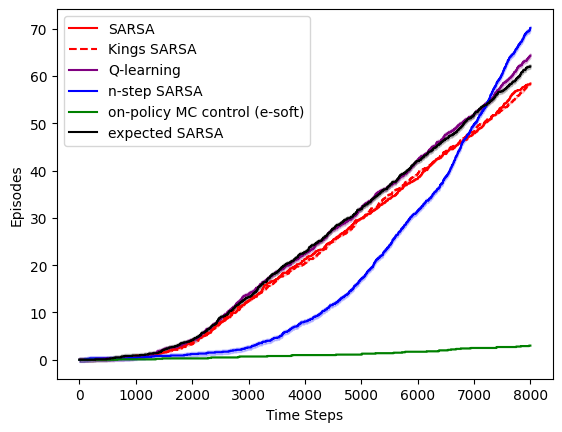

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

register_env_1()
env_n = gym.make('WindyGridWorld-v0')

register_env_2()
env_k = gym.make('WindyGridWorldKings-v0')


print("Training SARSA")
outputs_n = np.ndarray((10, 8000))
outputs_k = np.ndarray((10, 8000))
for i in range(10):
    x = sarsa(env_n, 8000, 1, 0.1, 0.5)
    y = sarsa(env_k, 8000, 1, 0.1, 0.5)
    outputs_n[i] = x
    outputs_k[i] = y
avg_n = outputs_n.mean(axis=0)
avg_k = outputs_k.mean(axis=0)

plt.plot(avg_n, c='r', label='SARSA')
y_err = 1.96 * outputs_n.std(axis=0) * np.sqrt(1 / len(avg_n))
plt.fill_between(np.linspace(0, 8000 - 1, 8000), avg_n - y_err, avg_n + y_err, alpha=0.2, color='r')

plt.plot(avg_k, c='r', label='Kings SARSA', linestyle='dashed')
y_err = 1.96 * outputs_k.std(axis=0) * np.sqrt(1 / len(avg_k))
plt.fill_between(np.linspace(0, 8000 - 1, 8000), avg_k - y_err, avg_k + y_err, alpha=0.2, color='r')

print("Training Q-learning")
outputs = np.ndarray((10, 8000))
for i in range(10):
    x = q_learning(env_n, 8000, 1, 0.1, 0.5)
    outputs[i] = x
avg = outputs.mean(axis=0)
plt.plot(avg, c='purple', label='Q-learning')
y_err = 1.96 * avg.std() * np.sqrt(1 / len(avg))
plt.fill_between(np.linspace(0, 8000 - 1, 8000), avg - y_err, avg + y_err, alpha=0.2, color='purple')

print("Training n-step SARSA")
outputs = np.ndarray((10, 8000))
for i in range(10):
    x = nstep_sarsa(env_n, 8000, 1, 0.1, 0.5)
    outputs[i] = x
avg = outputs.mean(axis=0)
plt.plot(avg, c='blue', label='n-step SARSA')
y_err = 1.96 * avg.std() * np.sqrt(1 / len(avg))
plt.fill_between(np.linspace(0, 8000 - 1, 8000), avg - y_err, avg + y_err, alpha=0.2, color='blue')

print("Training on-policy MC control (e-soft)")
outputs = np.ndarray((10, 8000))
for i in range(10):
    x = on_policy_mc_control_epsilon_soft(env_n, 8000, .7, .5)
    outputs[i] = x
    print(i)
    print(x)
avg = outputs.mean(axis=0)
plt.plot(avg, c='green', label='on-policy MC control (e-soft)')
y_err = 1.96 * avg.std() * np.sqrt(1 / len(avg))
plt.fill_between(np.linspace(0, 8000 - 1, 8000), avg - y_err, avg + y_err, alpha=0.2, color='green')

print("Training expected SARSA")
outputs = np.ndarray((10, 8000))
for i in range(10):
    x = exp_sarsa(env_n, 8000, 1, 0.1, 0.5)
    outputs[i] = x
avg = outputs.mean(axis=0)
plt.plot(avg, c='black', label='expected SARSA')
y_err = 1.96 * avg.std() * np.sqrt(1 / len(avg))
plt.fill_between(np.linspace(0, 8000 - 1, 8000), avg - y_err, avg + y_err, alpha=0.2, color='black')


plt.xlabel("Time Steps")
plt.ylabel("Episodes")
plt.legend()
plt.show()


4)